Display the different models performance over each simulation

In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False,
                 "axes.spines.bottom": False, "figure.dpi": 100}
sns.set_theme(style = "whitegrid", rc = custom_params, font_scale = 1.75)

In [2]:
path = 'results/'

In [121]:
# Naming for all 
models = {
    'correct': 'Correct', 
    'mm': 'LMM',
    'all': 'All', 
    'outcomes': r'Mis. $y$', 
    'sigma': r'Mis. $\omega$', 
    'nore': r'No $u^\omega$',
    'sigmanore': r'No $u^\omega$ + Mis. $\omega$',
    'melsm_notime': 'No slopes',
    'melsm_notimeomega': 'No $u^\omega_{age}$',
    'gaussian': 'Gaussian', 
    'nonsinus': 'Non sinus',
    'incorrect': r'Uncorrelated ($u^\omega$, $u^y$)'
    }

covariates = {
    # Covariates for mean
    'b_age': (r'$\beta^y[Age]$', 0.5),
    'b_albumin': (r'$\beta^y[Albumin]$', 0.5),
    'b_trig': (r'$\beta^y[Trig]$', 0),
    'b_platelet': (r'$\beta^y[Platelet]$', 0),

    'sd_id__Intercept': (r'$\sigma_{y}$', 1),

    # Covariates for variance
    'b_sigma_age': (r'$\beta^{\omega}[Age]$', 0.8),
    'b_sigma_albumin': (r'$\beta^{\omega}[Albumin]$', 0),
    'b_sigma_trig': (r'$\beta^{\omega}[Trig]$', 0.8),
    'b_sigma_platelet': (r'$\beta^{\omega}[Platelet]$', 0),

    'sd_id__sigma_Intercept': (r'$\sigma_{\omega}$', 0.5),
    'sd_id__sigma_age': (r'$\sigma_{\omega}[Age]$', 0.25)
    }

In [122]:
# Error to analyze
parameter = 'b_age'

In [123]:
naming, value = covariates[parameter]

In [126]:
def evaluate(path, parameter = parameter):
    print(path, ' - ', len(os.listdir(path)))

    estimates, ci, esterror, coverage = {}, {}, {}, {}

    # Evaluate by iterating across folder structure and averaging for each model types
    for replication in os.listdir(path):
        model_path = path + replication + '/'
        for model in os.listdir(model_path):
            if '.csv' not in model: continue

            csv_file = pd.read_csv(model_path + model, index_col = 0)
            model = models[model[:-4]] # Remove .csv extension
            if model not in estimates:
                estimates[model], ci[model], esterror[model], coverage[model] = [], [], [], []
                
            if parameter in csv_file.index: 
                csv_file = csv_file.loc[parameter]             
                estimates[model].append(csv_file['Estimate'])
                ci[model].append(csv_file['Q97.5'] - csv_file['Q2.5'])
                esterror[model].append(csv_file['Est.Error'])
                coverage[model].append((csv_file['Q97.5'] > value) & (value > csv_file['Q2.5']))

    return estimates, ci, esterror, coverage

In [128]:
estimates, ci, esterror, coverage = {}, {}, {}, {}
for experiment in os.listdir(path):
    for number in os.listdir(path + experiment):
        # Check if directory
        if experiment in ['Individuals', 'Points', 'Correlated Random Effect']:
            estimates[(experiment, int(number))], ci[(experiment, int(number))], \
            esterror[(experiment, int(number))], coverage[(experiment, int(number))] = evaluate(path + experiment + '/' + number + '/')
        else:
            estimates[(experiment, -1)], ci[(experiment, -1)], \
            esterror[(experiment, -1)], coverage[(experiment, -1)] = evaluate(path + experiment + '/')
            break   

estimates, ci, esterror, coverage = pd.DataFrame(estimates), pd.DataFrame(ci), pd.DataFrame(esterror), pd.DataFrame(coverage)
estimates.index.name, ci.index.name, esterror.index.name, coverage.index.name = 'Models', 'Models', 'Models', 'Models'

results/Misspecification/  -  2
results/Time/  -  2
results/Individuals/500/  -  2
results/Individuals/100/  -  2
results/Individuals/300/  -  2


# Display tables

In [129]:
# Std of estimates
estimates.map(np.std)

/home/vincent/miniconda3/envs/Jupyter/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/vincent/miniconda3/envs/Jupyter/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/vincent/miniconda3/envs/Jupyter/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Misspecification      Time Individuals  \
                                          -1        -1           500   
Models                                                                 
No $u^\omega$ + Mis. $\omega$         0.135978       NaN         NaN   
Correct                               0.325888  0.799636    0.342374   
Mis. $\omega$                         0.153546       NaN         NaN   
Mis. $y$                                   NaN       NaN         NaN   
All                                   0.162006       NaN         NaN   
LMM                                   0.015792       NaN    0.027420   
No $u^\omega$                         0.329794       NaN         NaN   
No $u^\omega_{age}$                        NaN  0.791819         NaN   
No slopes                                  NaN  0.327536         NaN   

                                                   
                                    100       300  
Models                                             
No $u^\omega$ + Mis. $\omega$       NaN       NaN  
Correct                        0.689143  0.800059  
Mis. $\omega$                       NaN       NaN  
Mis. $y$                            NaN       NaN  
All                                 NaN       NaN  
LMM                            0.206073  0.081666  
No $u^\omega$                       NaN       NaN  
No $u^\omega_{age}$                 NaN       NaN  
No slopes                           NaN       NaN

In [130]:
# Average of std
esterror.map(np.mean)

/home/vincent/miniconda3/envs/Jupyter/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/vincent/miniconda3/envs/Jupyter/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Misspecification      Time Individuals  \
                                          -1        -1           500   
Models                                                                 
No $u^\omega$ + Mis. $\omega$         0.261007       NaN         NaN   
Correct                               0.054329  0.000000    0.014917   
Mis. $\omega$                         0.293727       NaN         NaN   
Mis. $y$                                   NaN       NaN         NaN   
All                                   0.324814       NaN         NaN   
LMM                                   0.121610       NaN    0.105314   
No $u^\omega$                         0.028677       NaN         NaN   
No $u^\omega_{age}$                        NaN  0.000000         NaN   
No slopes                                  NaN  0.074571         NaN   

                                                   
                                    100       300  
Models                                             
No $u^\omega$ + Mis. $\omega$       NaN       NaN  
Correct                        0.040123  0.000000  
Mis. $\omega$                       NaN       NaN  
Mis. $y$                            NaN       NaN  
All                                 NaN       NaN  
LMM                            0.203728  0.094761  
No $u^\omega$                       NaN       NaN  
No $u^\omega_{age}$                 NaN       NaN  
No slopes                           NaN       NaN

In [131]:
# Average CI
ci.map(lambda x: '{:.2f} ({:.2f})'.format(np.mean(x), np.std(x)))

/home/vincent/miniconda3/envs/Jupyter/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/vincent/miniconda3/envs/Jupyter/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/vincent/miniconda3/envs/Jupyter/lib/python3.9/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/vincent/miniconda3/envs/Jupyter/lib/python3.9/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/vincent/miniconda3/envs/Jupyter/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Misspecification         Time  Individuals  \
                                          -1           -1            500   
Models                                                                     
No $u^\omega$ + Mis. $\omega$      0.64 (0.38)    nan (nan)    nan (nan)   
Correct                            0.15 (0.15)  0.00 (0.00)  0.04 (0.04)   
Mis. $\omega$                      0.79 (0.66)    nan (nan)    nan (nan)   
Mis. $y$                             nan (nan)    nan (nan)    nan (nan)   
All                                0.82 (0.20)    nan (nan)    nan (nan)   
LMM                                0.38 (0.15)    nan (nan)  0.30 (0.17)   
No $u^\omega$                      0.08 (0.08)    nan (nan)    nan (nan)   
No $u^\omega_{age}$                  nan (nan)  0.00 (0.00)    nan (nan)   
No slopes                            nan (nan)  0.21 (0.21)    nan (nan)   

                                                         
                                       100          300  
Models                                                   
No $u^\omega$ + Mis. $\omega$    nan (nan)    nan (nan)  
Correct                        0.10 (0.10)  0.00 (0.00)  
Mis. $\omega$                    nan (nan)    nan (nan)  
Mis. $y$                         nan (nan)    nan (nan)  
All                              nan (nan)    nan (nan)  
LMM                            0.58 (0.02)  0.29 (0.05)  
No $u^\omega$                    nan (nan)    nan (nan)  
No $u^\omega_{age}$              nan (nan)    nan (nan)  
No slopes                        nan (nan)    nan (nan)

# Displays error

In [143]:
coverage[simulation].loc[model]

-1    [True, True]
Name: No $u^\omega$ + Mis. $\omega$, dtype: object

TypeError: can only concatenate list (not "int") to list

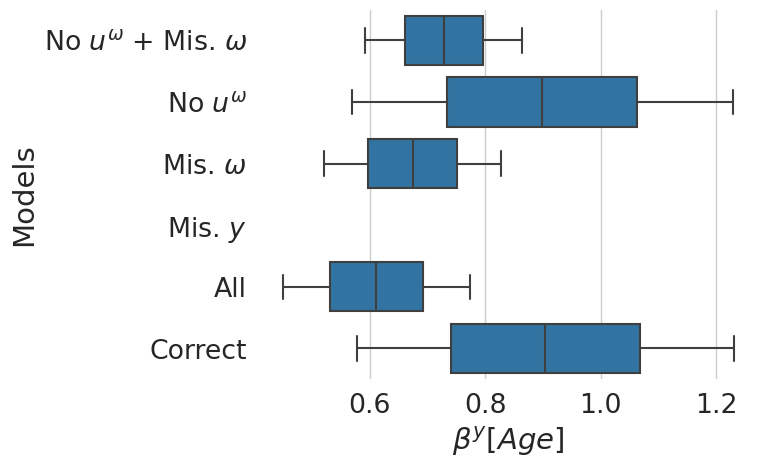

In [144]:
for simulation in estimates.columns.get_level_values(0).unique():
	shift = 0.025
	if simulation != 'Individuals' and simulation != 'Points':
		display = estimates[simulation][estimates.index != 'LMM']
	else:
		display = estimates[simulation]
	display = display.dropna()

	order = [m for m in models.values() if m in display.index.unique()][::-1]
	hue = simulation if len(display.columns) > 1 else None

	# Transform in long format
	display = display.apply(pd.Series.explode).melt(var_name = simulation, value_name = naming, ignore_index = False).reset_index()
	display = display if hue else display.drop(simulation, axis = 1)	
	ax = sns.boxplot(display, x = naming, y = "Models", order = order, hue = hue, color='tab:blue' if not hue else None) 

	yticks = ax.get_yticks()
	if simulation in display.columns:
		hue_values = display[simulation].unique()
		summary_values = display.groupby(["Models", simulation]).max()
		# Extract box positions
		box_positions = {}
		for i, m in enumerate(order):
			for j, h in enumerate(hue_values):
					offset = (j - (len(hue_values) - 1) / 2) * 0.2  # Adjust for hue groups
					box_positions[(m, h)] = yticks[i] + offset
	else:
		summary_values = display.groupby(["Models"]).max()
		# Extract box positions
		box_positions = {}
		for i, m in enumerate(order):
			box_positions[m] = yticks[i]

	# Annotate at the right end of each box
	for m in box_positions:
		val = coverage.loc[m].mean()
		ax.text(display.max(), i, f'{val:.0%}', ha='left',
				fontsize=15, xycoords='data', 
				xytext=(5, 0), textcoords='offset points', 
				va='center', color='black', 
				backgroundcolor='white')

	#plt.xlim(max(0, ax.get_xlim()[0]), max(xpos + shift * 3, ax.get_xlim()[1]))
	plt.axvline(value, color = 'tab:red', linestyle = '--')
	if hue:
		plt.legend(title = simulation, loc='center left', bbox_to_anchor=(1, 0.5))

	plt.title(simulation)
	#plt.savefig('images/{}/{}.png'.format(simulation, naming), bbox_inches='tight')
	plt.show()